In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import PyPDF2
from os import remove
from os import startfile

In [3]:
review = pd.read_csv('review_dataset.csv')

In [4]:
order = pd.read_csv('orders_2016-2020_Dataset.csv')

In [5]:
review.head()

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating


In [6]:
review.shape

(1861, 5)

In [7]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1861 non-null   object
 1   product_url   1861 non-null   object
 2   category      1861 non-null   object
 3   status        606 non-null    object
 4   stars         606 non-null    object
dtypes: object(5)
memory usage: 72.8+ KB


In [8]:
review.isnull().sum() # Number of missing values

product_name       0
product_url        0
category           0
status          1255
stars           1255
dtype: int64

In [9]:
review['status']

0       Reviewd
1       Reviewd
2       Reviewd
3       Reviewd
4       Reviewd
         ...   
1856        NaN
1857        NaN
1858        NaN
1859    Reviewd
1860        NaN
Name: status, Length: 1861, dtype: object

In [10]:
review['status'].unique()

array(['Reviewd', nan], dtype=object)

In [11]:
review['status'] = review['status'].fillna('Reviewd')

In [12]:
review['stars']

0       5.0 star rating
1       5.0 star rating
2       5.0 star rating
3       4.9 star rating
4       4.9 star rating
             ...       
1856                NaN
1857                NaN
1858                NaN
1859    5.0 star rating
1860                NaN
Name: stars, Length: 1861, dtype: object

In [13]:
review['stars'].unique()

array(['5.0 star rating', '4.9 star rating', '4.6 star rating',
       '4.8 star rating', '4.0 star rating', nan, '3.0 star rating',
       '2.3 star rating', '4.3 star rating', '4.7 star rating',
       '3.3 star rating', '4.2 star rating', '4.5 star rating'],
      dtype=object)

In [14]:
review['stars'].mode()

0    5.0 star rating
Name: stars, dtype: object

In [15]:
review['stars'] = review['stars'].fillna('no_review')

In [16]:
review.isnull().sum()

product_name    0
product_url     0
category        0
status          0
stars           0
dtype: int64

In [17]:
review['stars'].value_counts()

no_review          1255
5.0 star rating     499
4.9 star rating      33
4.5 star rating      16
4.8 star rating      13
4.7 star rating       8
4.6 star rating       7
4.3 star rating       7
4.2 star rating       7
3.0 star rating       6
4.0 star rating       4
2.3 star rating       4
3.3 star rating       2
Name: stars, dtype: int64

In [18]:
import matplotlib.backends.backend_tkagg
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
review['stars']

0       5.0 star rating
1       5.0 star rating
2       5.0 star rating
3       4.9 star rating
4       4.9 star rating
             ...       
1856          no_review
1857          no_review
1858          no_review
1859    5.0 star rating
1860          no_review
Name: stars, Length: 1861, dtype: object

In [20]:
review['stars'] = review['stars'].str.split(' ')

In [21]:
review['stars']

0       [5.0, star, rating]
1       [5.0, star, rating]
2       [5.0, star, rating]
3       [4.9, star, rating]
4       [4.9, star, rating]
               ...         
1856            [no_review]
1857            [no_review]
1858            [no_review]
1859    [5.0, star, rating]
1860            [no_review]
Name: stars, Length: 1861, dtype: object

In [22]:
spilt_review_dataframe = pd.DataFrame(review['stars'].tolist())
spilt_review_dataframe

,0,1,2
0,5.0,star,rating
1,5.0,star,rating
2,5.0,star,rating
3,4.9,star,rating
4,4.9,star,rating
...,...,...,...
1856,no_review,None,None
1857,no_review,None,None
1858,no_review,None,None
1859,5.0,star,rating


In [23]:
review['stars'] = spilt_review_dataframe[0]

In [24]:
review['stars']

0             5.0
1             5.0
2             5.0
3             4.9
4             4.9
          ...    
1856    no_review
1857    no_review
1858    no_review
1859          5.0
1860    no_review
Name: stars, Length: 1861, dtype: object

In [25]:
review['stars'].unique()

array(['5.0', '4.9', '4.6', '4.8', '4.0', 'no_review', '3.0', '2.3',
       '4.3', '4.7', '3.3', '4.2', '4.5'], dtype=object)

## Task - 1

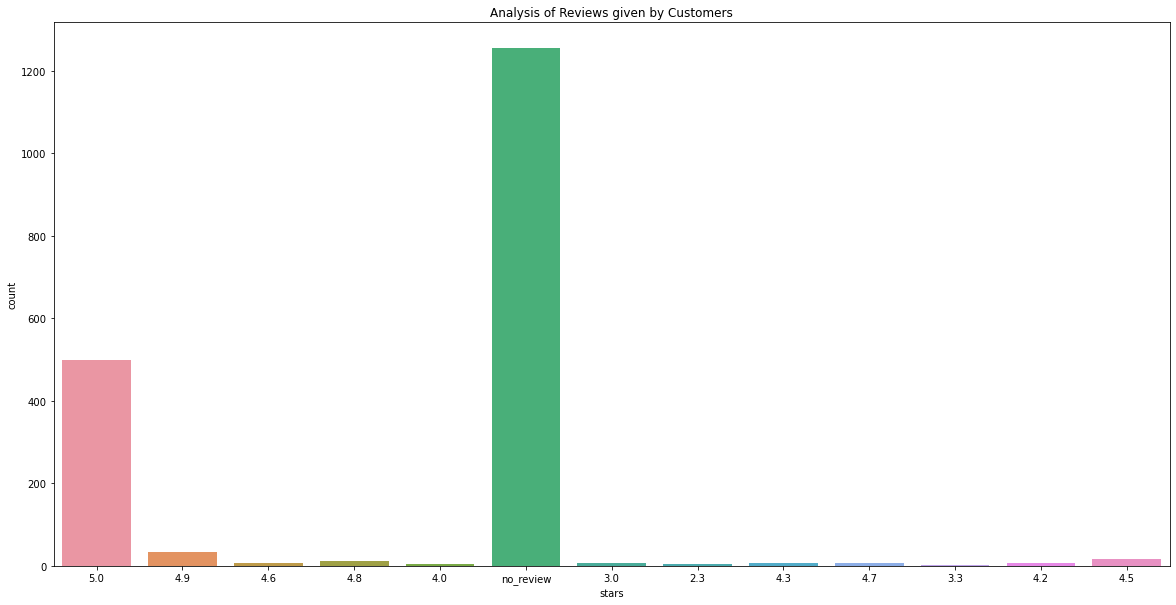

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(review['stars']).set_title('Analysis of Reviews given by Customers')
plt.savefig('edatask1.pdf')

## Task - 2

In [27]:
order.head()

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical


In [28]:
order.isnull().sum()

Order #                               0
Order Date and Time Stamp             0
Fulfillment Status                    0
Payment Status                        0
Payment Date and Time Stamp        2057
Fulfillment Date and Time Stamp    2068
Currency                              0
Subtotal                              0
Shipping Method                       0
Shipping Cost                         0
Tax Method                         2296
Taxes                                 0
Total                                 0
Coupon Code                        2140
Coupon Code Name                   2140
Discount                              0
Billing Name                       1967
Billing Country                    1967
Billing Street Address             1967
Billing Street Address 2           2100
Billing City                       1967
Billing State                      1975
Billing Zip                        1967
Shipping Name                         0
Shipping Country                      0


In [29]:
order['Payment Method'].unique()

array([nan, 'CCAvenue ₹140.00', 'CCAvenue ₹1,700.00',
       'CCAvenue ₹1,299.00', 'CCAvenue ₹799.00', 'CCAvenue ₹1,599.00',
       'CCAvenue ₹6,999.00', 'Offline Payment ₹799.00',
       'Offline Payment ₹1,099.00', 'Offline Payment ₹1,999.00',
       'Offline Payment ₹299.00', 'Offline Payment ₹549.00',
       'Offline Payment ₹5,999.00',
       'Offline Payment ₹1,099.00;Offline Payment -₹1,099.00',
       'CCAvenue ₹1,099.00', 'Offline Payment ₹349.00',
       'Offline Payment ₹199.00', 'Offline Payment ₹400.00',
       'Offline Payment ₹1,199.00', 'Offline Payment ₹259.00',
       'Offline Payment ₹5,097.00', 'Offline Payment ₹230.00',
       'Offline Payment ₹4,369.05', 'Offline Payment ₹849.00',
       'Offline Payment ₹1,399.00;Offline Payment -₹1,399.00',
       'Offline Payment ₹699.00;Offline Payment -₹699.00',
       'CCAvenue ₹2,099.00', 'CCAvenue ₹1,596.00', 'CCAvenue ₹1,399.00',
       'Offline Payment ₹1,699.00', 'Offline Payment ₹800.00',
       'Offline Payment ₹1,399

In [30]:
order['Payment Method'].mode()

0    Offline Payment ₹1,499.00
Name: Payment Method, dtype: object

In [31]:
order['Payment Method'] = order['Payment Method'].fillna('Offline Payment ₹1,499.00')

In [32]:
order['Payment Method'] = order['Payment Method'].str.split('₹')

In [33]:
order['Payment Method']

0       [Offline Payment , 1,499.00]
1       [Offline Payment , 1,499.00]
2       [Offline Payment , 1,499.00]
3       [Offline Payment , 1,499.00]
4       [Offline Payment , 1,499.00]
                    ...             
2292    [Offline Payment , 1,499.00]
2293    [Offline Payment , 1,499.00]
2294    [Offline Payment , 1,499.00]
2295    [Offline Payment , 1,499.00]
2296    [Offline Payment , 2,000.00]
Name: Payment Method, Length: 2297, dtype: object

In [34]:
split_dataframe = pd.DataFrame(order['Payment Method'].tolist())

In [35]:
split_dataframe[0].unique()

array(['Offline Payment ', 'CCAvenue '], dtype=object)

In [36]:
split_dataframe[0]

0       Offline Payment 
1       Offline Payment 
2       Offline Payment 
3       Offline Payment 
4       Offline Payment 
              ...       
2292    Offline Payment 
2293    Offline Payment 
2294    Offline Payment 
2295    Offline Payment 
2296    Offline Payment 
Name: 0, Length: 2297, dtype: object

In [37]:
order['Payment Method'] = split_dataframe[0]

In [38]:
order.head()

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,Offline Payment,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,Offline Payment,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,Offline Payment,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,Offline Payment,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,Offline Payment,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical


In [39]:
order['Payment Method'].unique()

array(['Offline Payment ', 'CCAvenue '], dtype=object)

In [40]:
order['Payment Method'].value_counts()

Offline Payment     2252
CCAvenue              45
Name: Payment Method, dtype: int64

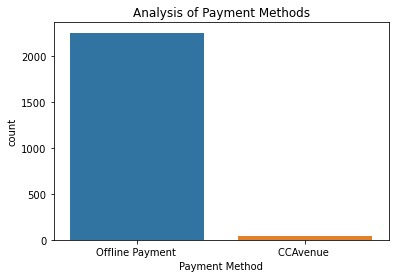

In [41]:
edatask2 = sns.countplot(order['Payment Method']).set(title='Analysis of Payment Methods')
plt.savefig('edatask2.pdf')

## Task - 3

In [42]:
order.isnull().sum() / order.shape[0] * 100

Order #                              0.000000
Order Date and Time Stamp            0.000000
Fulfillment Status                   0.000000
Payment Status                       0.000000
Payment Date and Time Stamp         89.551589
Fulfillment Date and Time Stamp     90.030475
Currency                             0.000000
Subtotal                             0.000000
Shipping Method                      0.000000
Shipping Cost                        0.000000
Tax Method                          99.956465
Taxes                                0.000000
Total                                0.000000
Coupon Code                         93.164998
Coupon Code Name                    93.164998
Discount                             0.000000
Billing Name                        85.633435
Billing Country                     85.633435
Billing Street Address              85.633435
Billing Street Address 2            91.423596
Billing City                        85.633435
Billing State                     

In [43]:
order['Billing State'].unique()

array([nan, 'IN-UP', 'IN-OR', 'IN-TN', 'IN-MH', 'IN-PB', 'IN-KL', 'IN-MP',
       'IN-NL', 'IN-AP', 'IN-KA', 'IN-DL', 'IN-RJ', 'IN-UT', 'IN-BR',
       'IN-JH', 'IN-PY', 'IN-AN', 'IN-HP', 'IN-HR', 'MA', 'IN-CT',
       'IN-WB', 'IN-TG', 'IN-GJ', 'IN-CH', 'IN-JK', 'IN-GA', 'IN-DN',
       'IN-DD', 'TX', 'PE'], dtype=object)

In [44]:
order['Billing State'].mode()

0    IN-TN
Name: Billing State, dtype: object

In [45]:
order['Billing State'] = order['Billing State'].fillna('IN-TN')

In [46]:
order['Billing State'].isnull().sum()

0

In [47]:
order['Billing State'].value_counts()[0:3] 

IN-TN    2045
IN-AN      50
IN-MH      32
Name: Billing State, dtype: int64

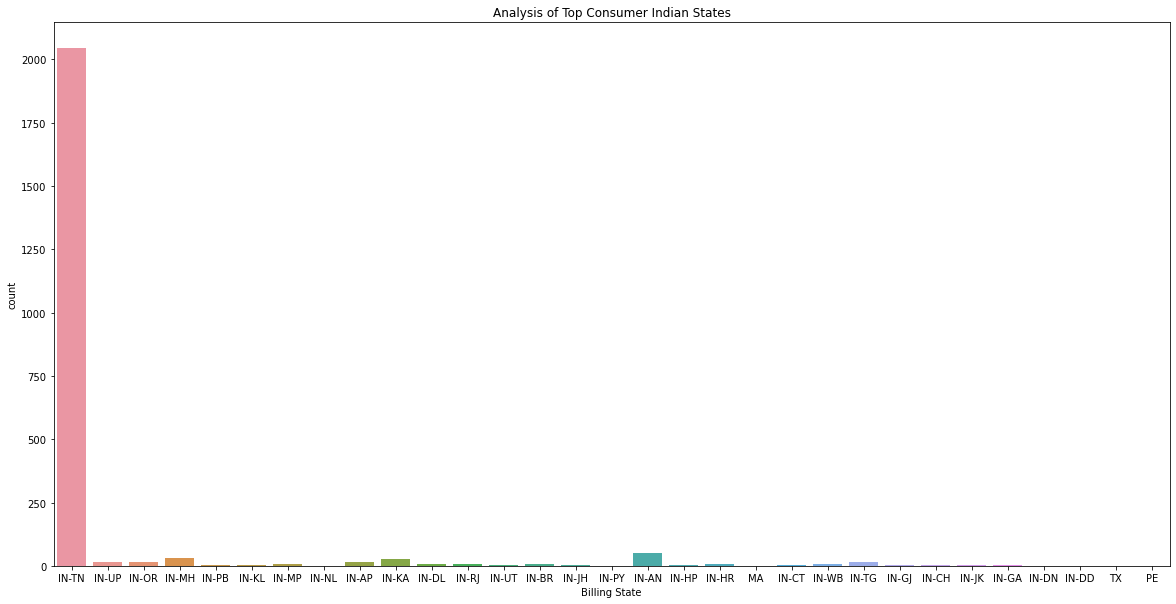

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(order['Billing State']).set_title('Analysis of Top Consumer Indian States')
plt.savefig('edatask3.pdf')

## Task - 4

In [49]:
order['Billing City'].unique()

array([nan, 'Allahabad', 'Bhubaneswar', 'CHENNAI ANNANAGAR', 'Kalyan',
       'Ludhiana', 'Chennai', 'Ernakulam', 'Noida', 'Bhopal', 'Dimapur',
       'PURI', 'Dombivli', 'S.rayavaram', 'Mandideep', 'Darwad', 'City',
       'Mumbai', 'Ghaziabad', 'Angul', 'Rewa', 'Bangalore', 'Delhi',
       'Pratapgarh', 'Haldwani', 'Anthiyur', 'GAYA', 'jhinkpani',
       'Yavatmal', 'Vardha', 'Pondicherry', 'TIRUPATI', 'Raebareli',
       'INDORE', 'Ranchi', 'Gautam Buddha Nagar', 'chennai 600009',
       'Baddi', 'Salem', 'Bengaluru', 'Dharwad', 'Pune', 'Gingee',
       'Visakhapatnam', 'Tets', 'Maruti Kunj', 'Dehradun', 'GHAZIABAD',
       'Barmer', 'BANGALORE', 'Jammu', 'AshlandAshland', 'Nagpur',
       'Kanchipuram', 'Pundri', 'Rajnandgaon', 'Rajnandgoan', 'Kharagpur',
       'New Delhi', 'Guna', 'HYDERABAD', 'Banglore', 'Mangalore',
       'LUDHIANA', 'Thane', 'Suryapet', 'Ahmedabad', 'Nizamabad',
       'ग्राम सादुलपुर', 'Vijayapur', 'pioyuih', 'Bettiah', 'Coimbatore',
       'bangalore', 'CHE

In [50]:
order['Billing City'].mode()

0    Chennai
Name: Billing City, dtype: object

In [51]:
order['Billing City'] = order['Billing City'].fillna('Chennai')

In [52]:
order['Billing City'].value_counts()[0:3]

Chennai      1988
chennai        16
Bangalore      12
Name: Billing City, dtype: int64

In [53]:
order['Billing City'] = order['Billing City'].replace('chennai', 'Chennai')

In [54]:
order['Billing City'].value_counts()

Chennai                                2004
Bangalore                                12
CHENNAI                                   9
Mumbai                                    8
test                                      7
                                       ... 
Tumkur                                    1
DHANBAD                                   1
Tiptur                                    1
paonta sahib,distt.sirmour,taruwala       1
berhampur                                 1
Name: Billing City, Length: 190, dtype: int64

In [55]:
orderCleaned = order["Billing City"]
filter1 = orderCleaned != "test"
filter2 = orderCleaned != "TAMILNADU"
filter3 = orderCleaned != "dwwwwwwww"
filter4 = orderCleaned != "rgtvrg"
orderCleaned = orderCleaned.where(filter1 & filter2 & filter3 & filter4, inplace = False).replace('CHENNAI', 'Chennai')
orderCleaned.unique()

array(['Chennai', 'Allahabad', 'Bhubaneswar', 'CHENNAI ANNANAGAR',
       'Kalyan', 'Ludhiana', 'Ernakulam', 'Noida', 'Bhopal', 'Dimapur',
       'PURI', 'Dombivli', 'S.rayavaram', 'Mandideep', 'Darwad', 'City',
       'Mumbai', 'Ghaziabad', 'Angul', 'Rewa', 'Bangalore', 'Delhi',
       'Pratapgarh', 'Haldwani', 'Anthiyur', 'GAYA', 'jhinkpani',
       'Yavatmal', 'Vardha', 'Pondicherry', 'TIRUPATI', 'Raebareli',
       'INDORE', 'Ranchi', 'Gautam Buddha Nagar', 'chennai 600009',
       'Baddi', 'Salem', 'Bengaluru', 'Dharwad', 'Pune', 'Gingee',
       'Visakhapatnam', 'Tets', 'Maruti Kunj', 'Dehradun', 'GHAZIABAD',
       'Barmer', 'BANGALORE', 'Jammu', 'AshlandAshland', 'Nagpur',
       'Kanchipuram', 'Pundri', 'Rajnandgaon', 'Rajnandgoan', 'Kharagpur',
       'New Delhi', 'Guna', 'HYDERABAD', 'Banglore', 'Mangalore',
       'LUDHIANA', 'Thane', 'Suryapet', 'Ahmedabad', 'Nizamabad',
       'ग्राम सादुलपुर', 'Vijayapur', 'pioyuih', 'Bettiah', 'Coimbatore',
       'bangalore', 'Gurgaon'

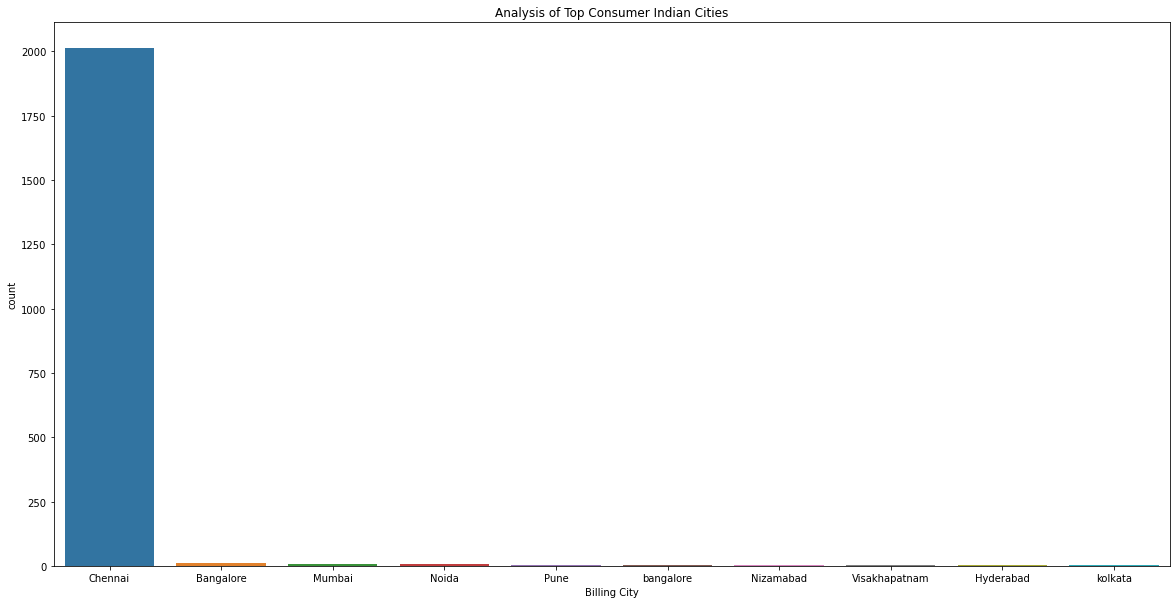

In [56]:
plt.figure(figsize=(20,10))
sns.countplot(orderCleaned, order=orderCleaned.value_counts().iloc[:10].index).set_title('Analysis of Top Consumer Indian Cities')
plt.savefig('edatask4.pdf')

## Task - 5

In [57]:
review['category'].isnull().sum()

0

In [58]:
review['category'].value_counts()

Mobiles             163
Services            116
Chennai             112
Bengaluru           108
Accessories         107
                   ... 
Stationery            3
Personal Laptops      3
Gaming Laptops        3
Vegetable             1
Sunglasses            1
Name: category, Length: 62, dtype: int64

In [59]:
review['category'].mode()

0    Mobiles
Name: category, dtype: object

In [60]:
review['category'] =review['category'].replace('Chennai','Mobiles')
review['category'] =review['category'].replace('Bengaluru','Mobiles')
review['category'] =review['category'].replace('Mumbai','Mobiles')

In [61]:
review['category'].value_counts()[0:3]

Mobiles        475
Services       116
Accessories    107
Name: category, dtype: int64

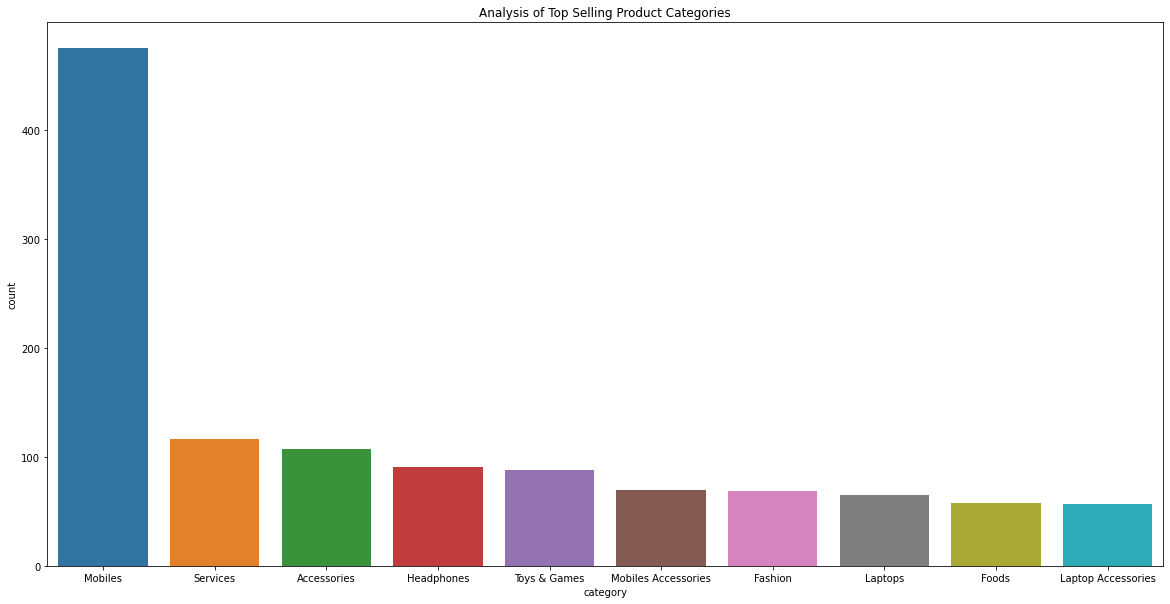

In [62]:
plt.figure(figsize = (20,10))
sns.countplot(review['category'], order=review['category'].value_counts().iloc[:10].index).set_title('Analysis of Top Selling Product Categories')
plt.savefig('edatask5.pdf')

## Task - 6

In [63]:
review['stars'].unique()

array(['5.0', '4.9', '4.6', '4.8', '4.0', 'no_review', '3.0', '2.3',
       '4.3', '4.7', '3.3', '4.2', '4.5'], dtype=object)

In [64]:
reviewlist = review['category'].value_counts().index.tolist()[:10]
selectedCategories = review[['category','stars']]
selectedCategories = selectedCategories[selectedCategories['category'].isin(reviewlist)]   ## https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition

for index in selectedCategories.index:
    if (selectedCategories['stars'][index] != 'no_review'):
        x = float(selectedCategories['stars'][index])
        if x >=  4.5 and x <  5:
            selectedCategories['stars'][index] = '4.5-5'
        if x >=  4.0 and x <  4.5:
            selectedCategories['stars'][index] = '4.0-4.5'
        if x >=  3.5 and x <  4:
            selectedCategories['stars'][index] = '3.5-4.0'
        if x >=  3.0 and x <  3.5:
            selectedCategories['stars'][index] = '3.0-3.5'
        if x >=  2.5 and x <  3:
            selectedCategories['stars'][index] = '2.5-3.0'
        if x >=  2.0 and x <  2.5:
            selectedCategories['stars'][index] = '2.0-2.5'

selectedCategories['stars'].unique()

array(['5.0', '4.5-5', '4.0-4.5', 'no_review', '3.0-3.5', '2.0-2.5'],
      dtype=object)

In [65]:
selectedCategories = selectedCategories.groupby('category').value_counts().to_frame()
selectedCategories.columns = ['Count']
selectedCategories

Count
category            stars           
Accessories         no_review     81
                    5.0           21
                    4.5-5          4
                    4.0-4.5        1
Fashion             no_review     44
                    5.0           24
                    4.5-5          1
Foods               no_review     56
                    5.0            2
Headphones          no_review     57
                    5.0           20
                    4.5-5         12
                    3.0-3.5        1
                    4.0-4.5        1
Laptop Accessories  no_review     43
                    5.0           11
                    4.5-5          3
Laptops             no_review     45
                    5.0           14
                    4.5-5          4
                    4.0-4.5        1
                    3.0-3.5        1
Mobiles             no_review    298
                    5.0          148
                    4.5-5         22
                    4.0-4.5        5
                    3.0-3.5        1
                    2.0-2.5        1
Mobiles Accessories no_review     50
                    5.0           12
                    4.5-5          4
                    4.0-4.5        3
                    2.0-2.5        1
Services            no_review     76
                    5.0           39
                    4.5-5          1
Toys & Games        no_review     53
                    5.0           26
                    4.5-5          6
                    3.0-3.5        1
                    2.0-2.5        1
                    4.0-4.5        1

In [66]:
selectedCategories['Count'].astype(int) ## Converting the last count column from string to int for plotting

category             stars    
Accessories          no_review     81
                     5.0           21
                     4.5-5          4
                     4.0-4.5        1
Fashion              no_review     44
                     5.0           24
                     4.5-5          1
Foods                no_review     56
                     5.0            2
Headphones           no_review     57
                     5.0           20
                     4.5-5         12
                     3.0-3.5        1
                     4.0-4.5        1
Laptop Accessories   no_review     43
                     5.0           11
                     4.5-5          3
Laptops              no_review     45
                     5.0           14
                     4.5-5          4
                     4.0-4.5        1
                     3.0-3.5        1
Mobiles              no_review    298
                     5.0          148
                     4.5-5         22
                   

In [67]:
selectedCategories = selectedCategories.unstack(level = 'stars').fillna(0)
cols_to_sum_stars = selectedCategories.columns[0:5].values
selectedCategories['Total (Reviewed)'] = selectedCategories[cols_to_sum_stars].sum(axis = 1)
cols_to_sum_stars = selectedCategories.columns[0:6].values
selectedCategories['Grand Total'] = selectedCategories[cols_to_sum_stars].sum(axis = 1)
selectedCategories

Count                                         \
stars               2.0-2.5 3.0-3.5 4.0-4.5 4.5-5    5.0 no_review   
category                                                             
Accessories             0.0     0.0     1.0   4.0   21.0      81.0   
Fashion                 0.0     0.0     0.0   1.0   24.0      44.0   
Foods                   0.0     0.0     0.0   0.0    2.0      56.0   
Headphones              0.0     1.0     1.0  12.0   20.0      57.0   
Laptop Accessories      0.0     0.0     0.0   3.0   11.0      43.0   
Laptops                 0.0     1.0     1.0   4.0   14.0      45.0   
Mobiles                 1.0     1.0     5.0  22.0  148.0     298.0   
Mobiles Accessories     1.0     0.0     3.0   4.0   12.0      50.0   
Services                0.0     0.0     0.0   1.0   39.0      76.0   
Toys & Games            1.0     1.0     1.0   6.0   26.0      53.0   

                    Total (Reviewed) Grand Total  
stars                                             
category                                          
Accessories                     26.0       107.0  
Fashion                         25.0        69.0  
Foods                            2.0        58.0  
Headphones                      34.0        91.0  
Laptop Accessories              14.0        57.0  
Laptops                         20.0        65.0  
Mobiles                        177.0       475.0  
Mobiles Accessories             20.0        70.0  
Services                        40.0       116.0  
Toys & Games                    35.0        88.0

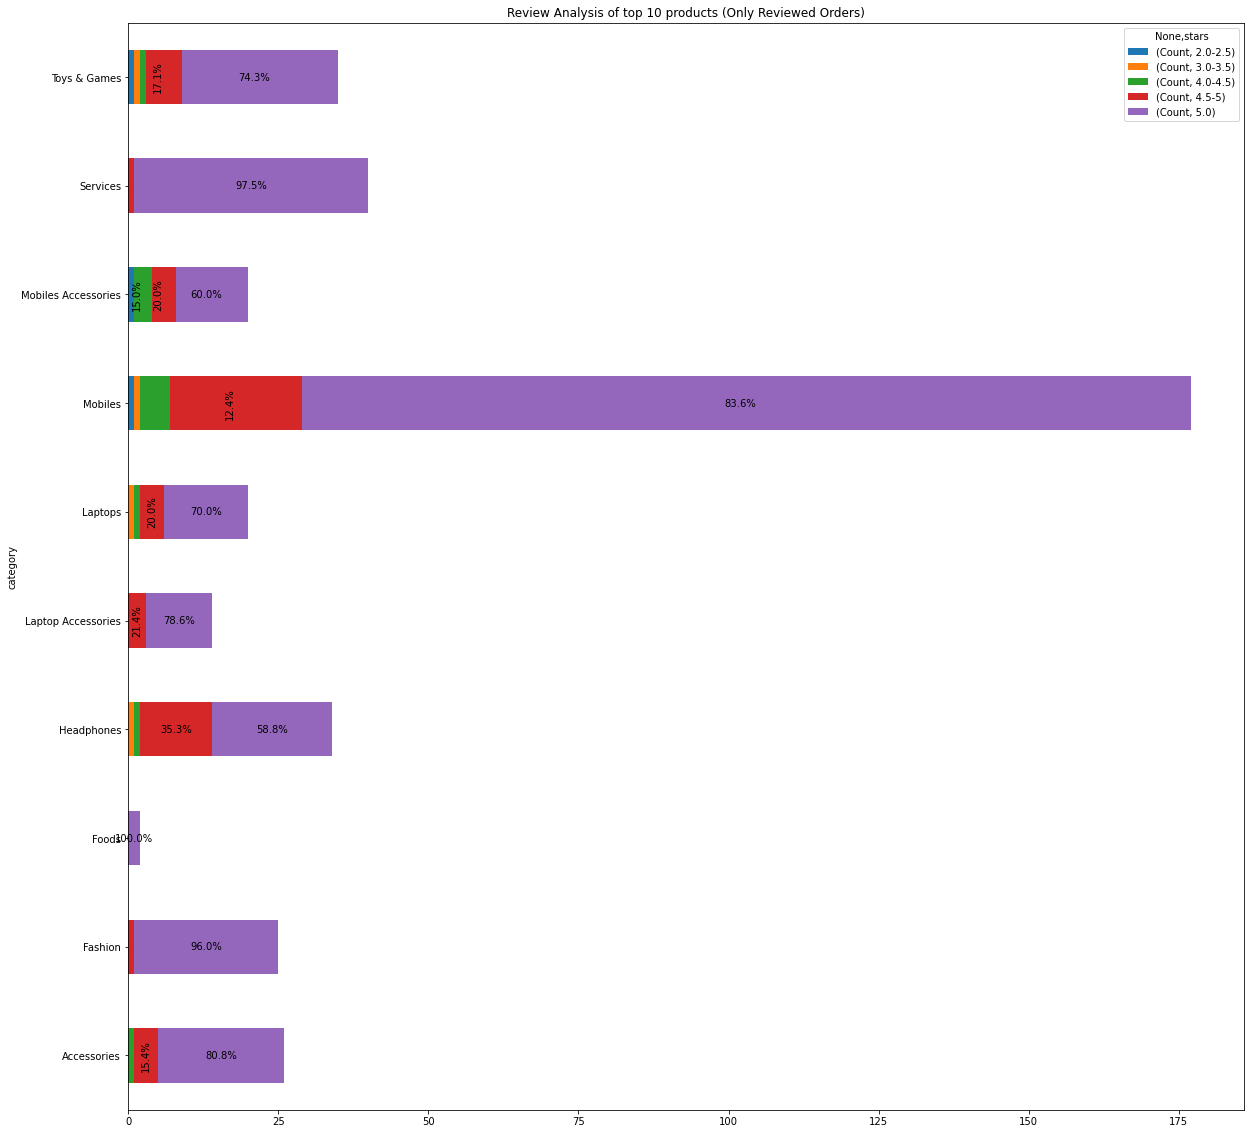

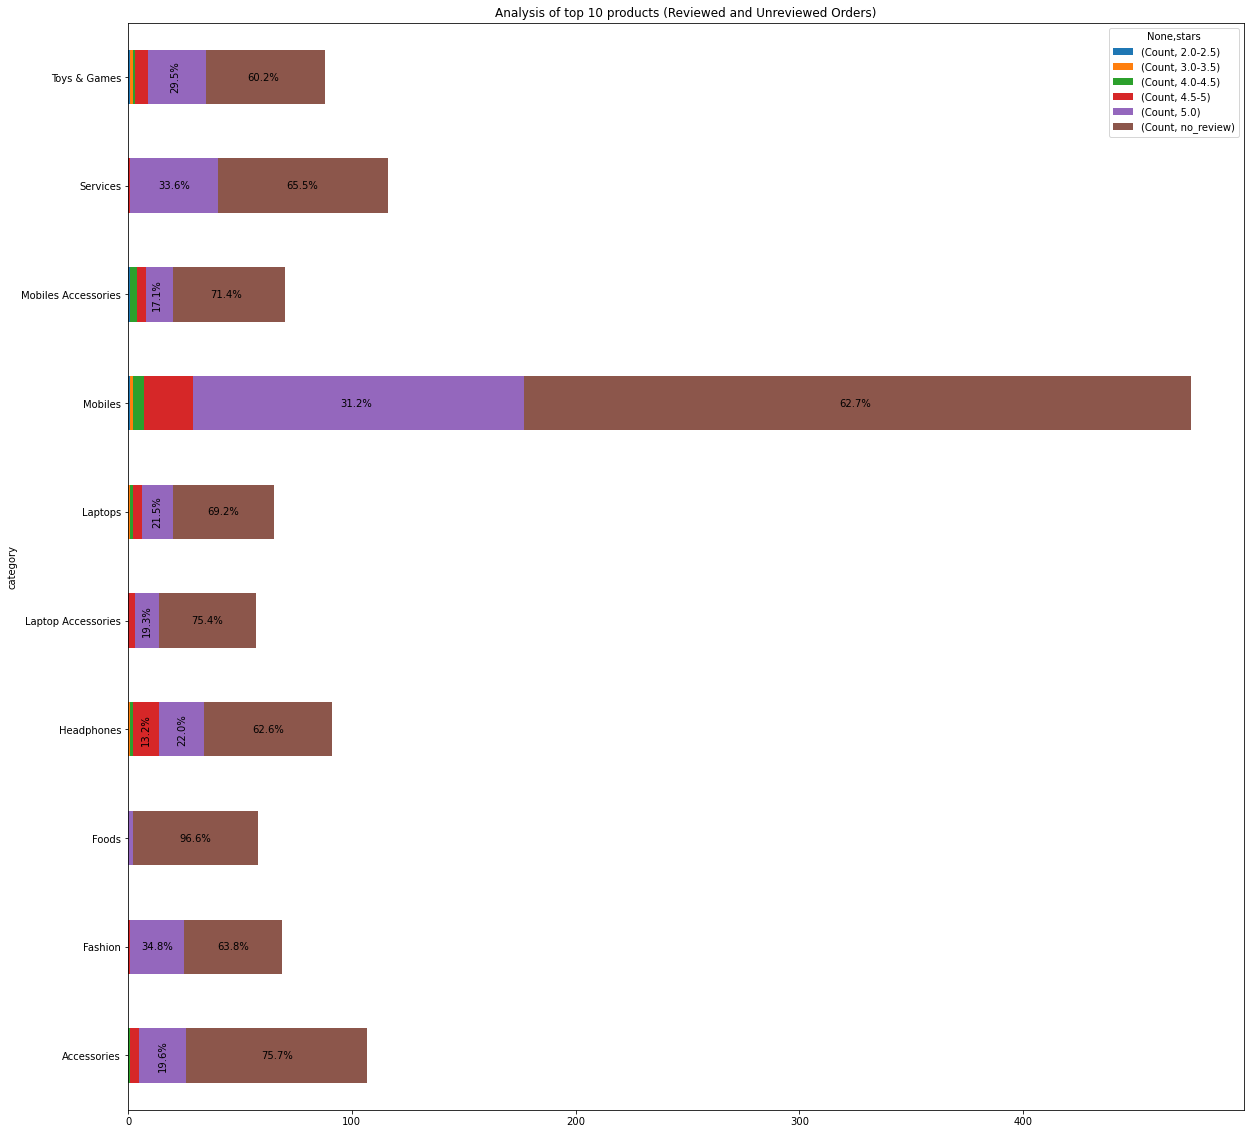

In [69]:
df_total_2 = selectedCategories['Total (Reviewed)']
df_2 = selectedCategories.iloc[:, 0:5]
df_2.plot(kind='barh',stacked = True, title = 'Review Analysis of top 10 products (Only Reviewed Orders)', mark_right = True, figsize=(20, 20))

df_rel_2 = df_2[df_2.columns[1:]].div(df_total_2, 0)*100

for n in df_rel_2:
    for i, (cs, ab, pc, tot) in enumerate(zip(df_2.iloc[:, 1:].cumsum(1)[n], df_2[n], df_rel_2[n], df_total_2)):
        if pc >= 30:
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center')
        elif (pc >=10 and pc < 30):
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center', rotation=90)

plt.savefig('edatask6_2.pdf')
            
df_total_1 = selectedCategories['Grand Total']
df_1 = selectedCategories.iloc[:, 0:6]
df_1.plot(kind='barh',stacked = True, title = 'Analysis of top 10 products (Reviewed and Unreviewed Orders)', mark_right = True, figsize=(20, 20))

df_rel_1 = df_1[df_1.columns[1:]].div(df_total_1, 0)*100

for n in df_rel_1:
    for i, (cs, ab, pc, tot) in enumerate(zip(df_1.iloc[:, 1:].cumsum(1)[n], df_1[n], df_rel_1[n], df_total_1)):
        if pc >= 30:
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center')
        elif (pc >=10 and pc < 30):
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center', rotation=90)

plt.savefig('edatask6_1.pdf')  

pdfs = ['edatask6_2.pdf', 'edatask6_1.pdf']

merger = PyPDF2.PdfMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("edatask6.pdf")
merger.close()

In [70]:
for pdf in pdfs:
    remove(pdf)


## Task - 7

In [71]:
#to see the analysis of Number of Orders Per Month Per Year

In [72]:
order['Order Date and Time Stamp']

0       09-11-2020 20:36:26 +0530
1       09-11-2020 20:18:26 +0530
2       09-11-2020 19:56:21 +0530
3       09-11-2020 19:37:40 +0530
4       09-11-2020 18:35:47 +0530
                  ...            
2292    05-10-2016 04:17:45 +0530
2293    03-10-2016 15:10:47 +0530
2294    29-09-2016 18:33:27 +0530
2295    28-09-2016 18:59:22 +0530
2296    28-09-2016 15:37:32 +0530
Name: Order Date and Time Stamp, Length: 2297, dtype: object

In [73]:
order['months'] = pd.DatetimeIndex(order['Order Date and Time Stamp']).month

In [74]:
order['year'] = pd.DatetimeIndex(order['Order Date and Time Stamp']).year

In [75]:
order

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type,months,year
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical,9,2020
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical,9,2020
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical,9,2020
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical,9,2020
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical,9,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,R243395005,05-10-2016 04:17:45 +0530,Cancelled,Unpaid,NaN,NaN,INR,₹ 50.00,Ships Free,₹ 0.00,...,NaN,Ear Wired Earphones With Mic White,11,NaN,NaN,1,₹ 50.00,physical,5,2016
2293,R607209508,03-10-2016 15:10:47 +0530,Cancelled,Unpaid,NaN,NaN,INR,₹ 500.00,Ships Free,₹ 0.00,...,NaN,I Kall K-66 White,9,NaN,NaN,1,₹ 500.00,physical,3,2016
2294,R140316623,29-09-2016 18:33:27 +0530,Cancelled,Unpaid,NaN,NaN,INR,"₹ 4,000.00",Ships Free,₹ 0.00,...,NaN,Electric Steam Cooker Maestro MC1,1,NaN,NaN,2,"₹ 2,000.00",physical,9,2016
2295,R192037084,28-09-2016 18:59:22 +0530,Cancelled,Unpaid,NaN,NaN,INR,"₹ 2,000.00",Ships Free,₹ 0.00,...,NaN,Electric Steam Cooker Maestro MC1,1,NaN,NaN,1,"₹ 2,000.00",physical,9,2016


In [76]:
order['LineItem Qty'].unique()

array([  1,   2, 999,   5,   8,  20,  10, 100,   3,  13,   4,  15,  12,
        16,  22,  24,  50,   6,  30,  55,   9,  27,  25,  93], dtype=int64)

In [77]:
order.groupby('year')['LineItem Qty'].count()

year
2016      63
2017     118
2018     251
2019     210
2020    1655
Name: LineItem Qty, dtype: int64

<AxesSubplot:ylabel='months'>

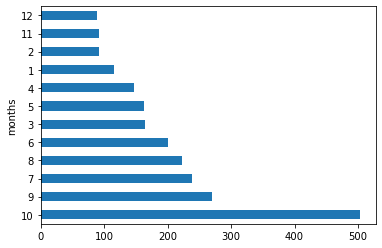

In [78]:
order.groupby('months')['LineItem Qty'].count().sort_values(ascending=False).plot.barh()

<AxesSubplot:ylabel='year'>

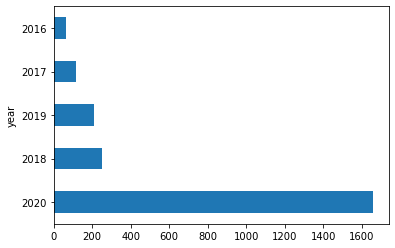

In [79]:
order.groupby('year')['LineItem Qty'].count().sort_values(ascending=False).plot.barh()

In [80]:
order.groupby(['year', 'months'])['LineItem Qty'].count()

year  months
2016  2           1
      3           2
      5           1
      6          34
      7           3
      8           1
      9           3
      10          8
      11          8
      12          2
2017  1           3
      2          10
      3           8
      4           3
      5           9
      6           4
      7          22
      8          24
      9           7
      10          8
      11          9
      12         11
2018  1           9
      2          14
      3          26
      4          16
      5          18
      6          12
      7          27
      8          42
      9          30
      10         25
      11         20
      12         12
2019  1          26
      2          10
      3          14
      4          24
      5          19
      6          19
      7          19
      8          15
      9          10
      10         18
      11         19
      12         17
2020  1          78
      2          57
      3         114
      4

In [81]:
order16 = order

In [82]:
order2016 = order16.groupby(['year', 'months'])['LineItem Qty'].count()  ## This would result in a series

In [83]:
order2016df = order2016.to_frame()  ## The series is converted into a data frame

In [84]:
order2016df

LineItem Qty
year months              
2016 2                  1
     3                  2
     5                  1
     6                 34
     7                  3
     8                  1
     9                  3
     10                 8
     11                 8
     12                 2
2017 1                  3
     2                 10
     3                  8
     4                  3
     5                  9
     6                  4
     7                 22
     8                 24
     9                  7
     10                 8
     11                 9
     12                11
2018 1                  9
     2                 14
     3                 26
     4                 16
     5                 18
     6                 12
     7                 27
     8                 42
     9                 30
     10                25
     11                20
     12                12
2019 1                 26
     2                 10
     3                 14
     4                 24
     5                 19
     6                 19
     7                 19
     8                 15
     9                 10
     10                18
     11                19
     12                17
2020 1                 78
     2                 57
     3                114
     4                103
     5                116
     6                131
     7                168
     8                141
     9                220
     10               444
     11                36
     12                47

In [85]:
orderDataFrameYear = order2016df.unstack(level='months')    ## Now the dataframe is unstacked! Very powerful method!!

In [86]:
orderDataFrameYear = orderDataFrameYear.fillna(0)
orderDataFrameYear

LineItem Qty                                                         \
months           1     2      3      4      5      6      7      8      9    
year                                                                         
2016            0.0   1.0    2.0    0.0    1.0   34.0    3.0    1.0    3.0   
2017            3.0  10.0    8.0    3.0    9.0    4.0   22.0   24.0    7.0   
2018            9.0  14.0   26.0   16.0   18.0   12.0   27.0   42.0   30.0   
2019           26.0  10.0   14.0   24.0   19.0   19.0   19.0   15.0   10.0   
2020           78.0  57.0  114.0  103.0  116.0  131.0  168.0  141.0  220.0   

                           
months     10    11    12  
year                       
2016      8.0   8.0   2.0  
2017      8.0   9.0  11.0  
2018     25.0  20.0  12.0  
2019     18.0  19.0  17.0  
2020    444.0  36.0  47.0

<AxesSubplot:title={'center':'Breakdown of Costs'}, xlabel='year'>

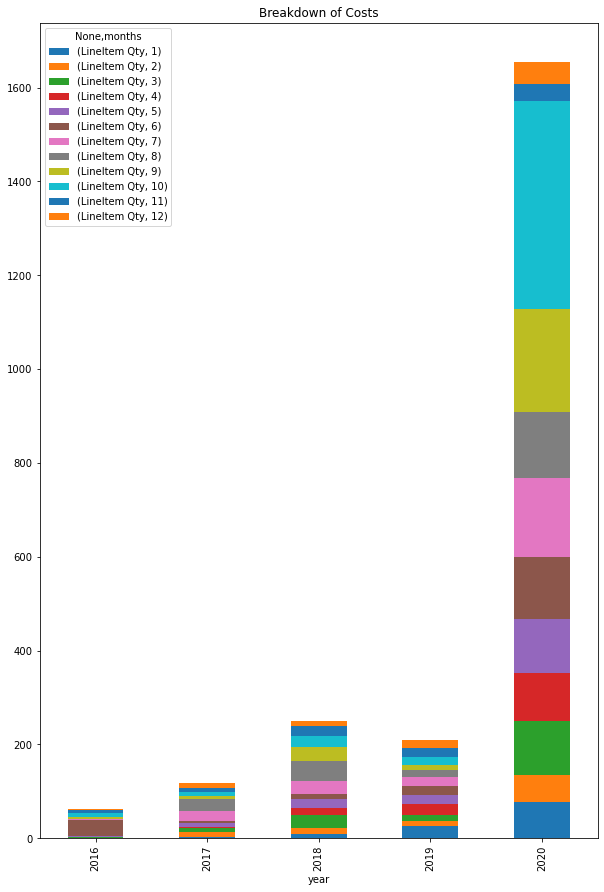

In [87]:
orderDataFrameYear.plot( kind='bar', stacked=True, title='Breakdown of Costs', mark_right=True, figsize=(10, 15))  

In [88]:
orderDataFrameMonth = order2016df.unstack(level='year') 

In [89]:
orderDataFrameMonth = orderDataFrameMonth.fillna(0)
orderDataFrameMonth

LineItem Qty                         
year           2016  2017  2018  2019   2020
months                                      
1               0.0   3.0   9.0  26.0   78.0
2               1.0  10.0  14.0  10.0   57.0
3               2.0   8.0  26.0  14.0  114.0
4               0.0   3.0  16.0  24.0  103.0
5               1.0   9.0  18.0  19.0  116.0
6              34.0   4.0  12.0  19.0  131.0
7               3.0  22.0  27.0  19.0  168.0
8               1.0  24.0  42.0  15.0  141.0
9               3.0   7.0  30.0  10.0  220.0
10              8.0   8.0  25.0  18.0  444.0
11              8.0   9.0  20.0  19.0   36.0
12              2.0  11.0  12.0  17.0   47.0

<AxesSubplot:title={'center':'Breakdown of Costs'}, xlabel='months'>

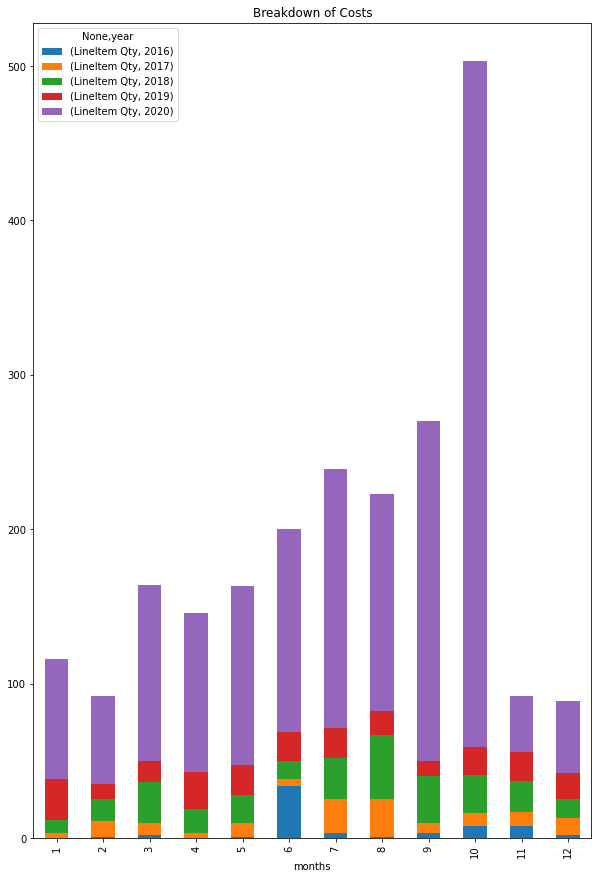

In [90]:
orderDataFrameMonth.plot( kind='bar', stacked=True, title='Breakdown of Costs', mark_right=True, figsize=(10, 15))  

In [91]:
orderDataFrameMonthTotal = orderDataFrameYear.sum()

In [92]:
orderDataFrameMonthTotal

              months
LineItem Qty  1         116.0
              2          92.0
              3         164.0
              4         146.0
              5         163.0
              6         200.0
              7         239.0
              8         223.0
              9         270.0
              10        503.0
              11         92.0
              12         89.0
dtype: float64

In [93]:
for column in orderDataFrameYear:
    orderDataFrameYear[column].astype(int)   ## Converting all the values in the dataframe to int

In [94]:
for column in orderDataFrameMonth:
    orderDataFrameMonth[column].astype(int)

In [95]:
cols_to_sum_year = orderDataFrameYear.columns.values
cols_to_sum_year

array([('LineItem Qty', 1), ('LineItem Qty', 2), ('LineItem Qty', 3),
       ('LineItem Qty', 4), ('LineItem Qty', 5), ('LineItem Qty', 6),
       ('LineItem Qty', 7), ('LineItem Qty', 8), ('LineItem Qty', 9),
       ('LineItem Qty', 10), ('LineItem Qty', 11), ('LineItem Qty', 12)],
      dtype=object)

In [96]:
orderDataFrameYear['Total'] = orderDataFrameYear[cols_to_sum_year].sum(axis = 1)
orderDataFrameYear

LineItem Qty                                                         \
months            1     2      3      4      5      6      7      8      9   
year                                                                         
2016            0.0   1.0    2.0    0.0    1.0   34.0    3.0    1.0    3.0   
2017            3.0  10.0    8.0    3.0    9.0    4.0   22.0   24.0    7.0   
2018            9.0  14.0   26.0   16.0   18.0   12.0   27.0   42.0   30.0   
2019           26.0  10.0   14.0   24.0   19.0   19.0   19.0   15.0   10.0   
2020           78.0  57.0  114.0  103.0  116.0  131.0  168.0  141.0  220.0   

                            Total  
months     10    11    12          
year                               
2016      8.0   8.0   2.0    63.0  
2017      8.0   9.0  11.0   118.0  
2018     25.0  20.0  12.0   251.0  
2019     18.0  19.0  17.0   210.0  
2020    444.0  36.0  47.0  1655.0

In [97]:
cols_to_sum_month = orderDataFrameMonth.columns.values
cols_to_sum_month

array([('LineItem Qty', 2016), ('LineItem Qty', 2017),
       ('LineItem Qty', 2018), ('LineItem Qty', 2019),
       ('LineItem Qty', 2020)], dtype=object)

In [98]:
orderDataFrameMonth['Total'] = orderDataFrameMonth[cols_to_sum_month].sum(axis = 1)
orderDataFrameMonth

LineItem Qty                           Total
year           2016  2017  2018  2019   2020       
months                                             
1               0.0   3.0   9.0  26.0   78.0  116.0
2               1.0  10.0  14.0  10.0   57.0   92.0
3               2.0   8.0  26.0  14.0  114.0  164.0
4               0.0   3.0  16.0  24.0  103.0  146.0
5               1.0   9.0  18.0  19.0  116.0  163.0
6              34.0   4.0  12.0  19.0  131.0  200.0
7               3.0  22.0  27.0  19.0  168.0  239.0
8               1.0  24.0  42.0  15.0  141.0  223.0
9               3.0   7.0  30.0  10.0  220.0  270.0
10              8.0   8.0  25.0  18.0  444.0  503.0
11              8.0   9.0  20.0  19.0   36.0   92.0
12              2.0  11.0  12.0  17.0   47.0   89.0

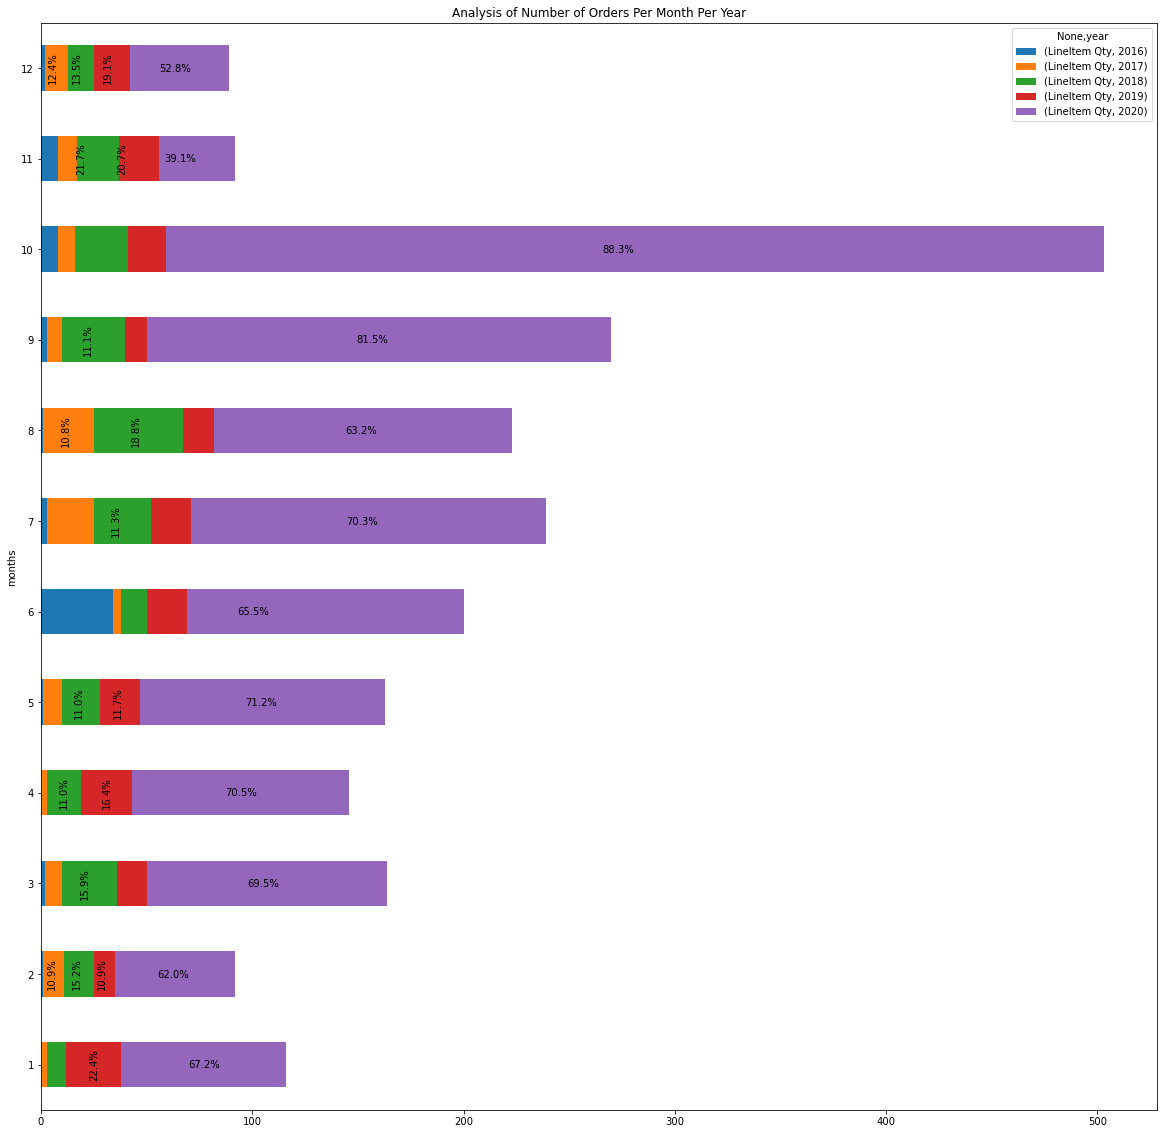

In [99]:
df_total = orderDataFrameMonth['Total']
df = orderDataFrameMonth.iloc[:, 0:5]
figure7 = df.plot(kind='barh',stacked = True, title = 'Analysis of Number of Orders Per Month Per Year', mark_right = True, figsize=(20, 20))

df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc, tot) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], df[n], df_rel[n], df_total)):
        if pc >= 30:
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center')
        elif (pc >=10 and pc < 30):
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center', rotation=90)

plt.savefig('edatask7.pdf')

In [100]:
review['product_name'].unique()

array(['Sony PlayStation PS2 Gaming Console 150 GB Hard Disk With 50 Games Preloaded(Black)',
       'Vmax HX 750 Quadcopter Drone (No Camera)',
       'Yoshops VR BOX Virtual Reality Glasses Headset 2.0 View Suitable For 4-6 Inch Smartphones',
       'Sony PlayStation PS3 Console Slim 320 GB (Black)',
       'Barbie Doll (pink)', 'HX-713 Remote Control Helicopter',
       'Puppy House Coin Piggy Bank',
       'The Amazing Spider Man Micro Drone Q Series Hyun Lights Upgraded Quadcopter Headless Mode One Key Features',
       'Super Power JCB Truck Construction Loader Excavator Crane Toys',
       'Falcon Drone Four Axis Aircraft with 2.4 GHz RC, Blade Guard, Headless Mode LED Without Camera',
       'Kids Drone Quadcopter 2.4G 6-Channel Without Camera',
       'Sony PlayStation PS1 with in-built DVD Player (Black)',
       'VMax HX763 Vision Drone 2.4GHz RC Quad-copter Headless Mode One Key Without Camera',
       'HX770 V-Max Aircraft Drone',
       'Diabolo Captain America Civil War 

# Task 8

In [101]:
order['Review'] = np.nan
for i in order['LineItem Name'].index:
    for j in review['product_name'].index:
        if order['LineItem Name'][i].strip().replace(" ", "") == review['product_name'][j].strip().replace(" ", ""):
            order['Review'][i] = review['stars'][j]

In [102]:
order['Review'] = order['Review'].fillna('no_review')

In [103]:
order_review = order.iloc[:,-3:]

In [104]:
order_review['Count'] = np.nan

In [105]:
order_review['Count'] = order_review['Count'].fillna(1)

In [106]:
for ind in order_review.index:
    if order_review['Review'][ind] != 'no_review':
        if float(order_review['Review'][ind]) >= 4.5 and float(order_review['Review'][ind]) <= 5:
            order_review['Review'][ind] = '4.5-5'
        elif float(order_review['Review'][ind]) >= 4.0 and float(order_review['Review'][ind]) < 4.5:
            order_review['Review'][ind] = '4.0-4.5'
        elif float(order_review['Review'][ind]) >= 3.5 and float(order_review['Review'][ind]) < 4:
            order_review['Review'][ind] = '3.5-4'
        elif float(order_review['Review'][ind]) >= 3.0 and float(order_review['Review'][ind]) < 3.5:
            order_review['Review'][ind] = '3-3.5'
        elif float(order_review['Review'][ind]) < 3:
            order_review['Review'][ind] = 'Less than 3'

In [113]:
order_review['Review'].unique()

array(['no_review', '4.5-5', '4.0-4.5', '3-3.5', 'Less than 3'],
      dtype=object)

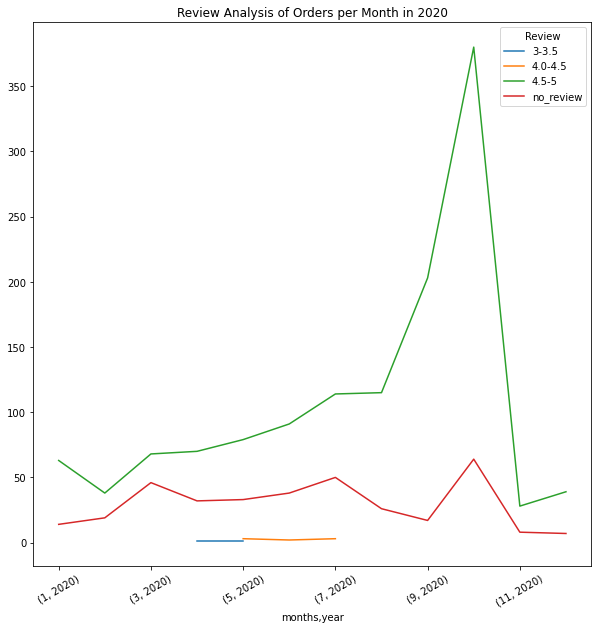

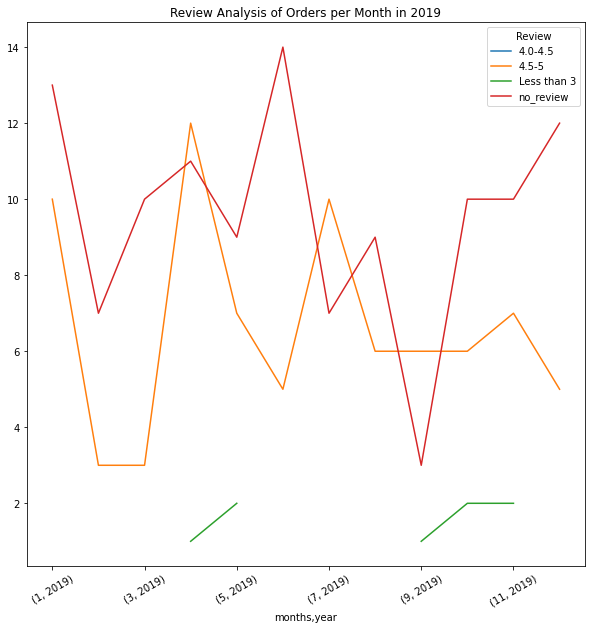

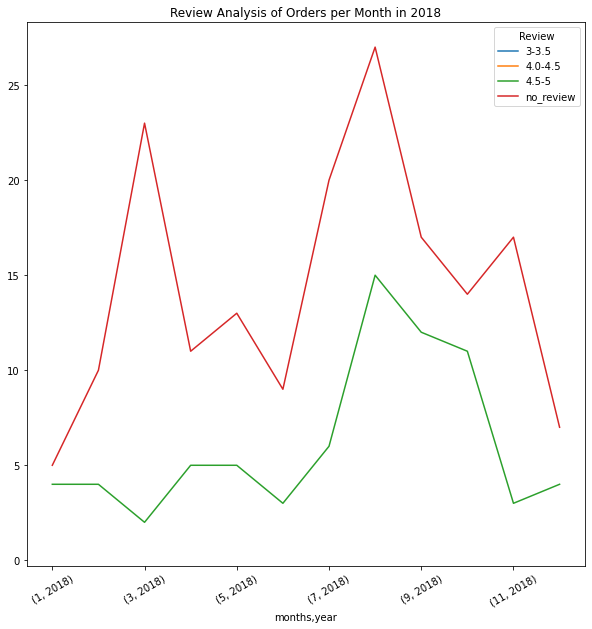

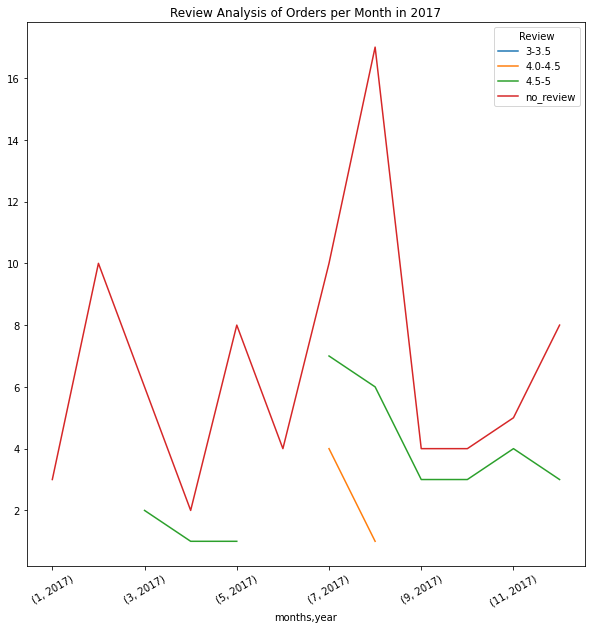

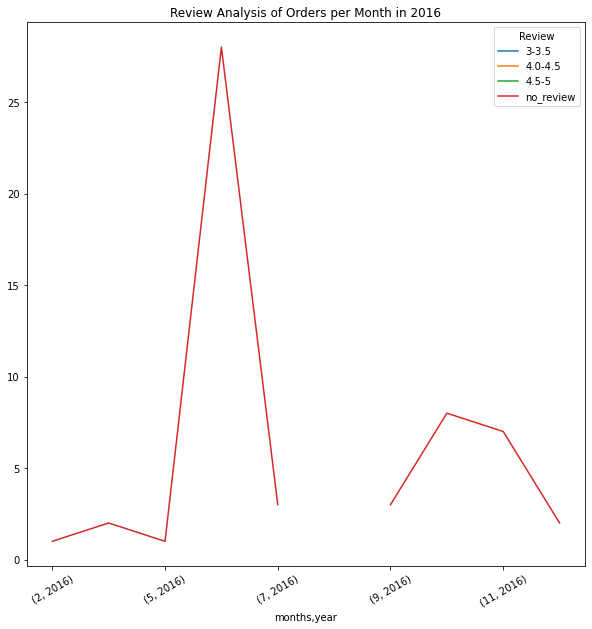

In [114]:
pdfs = []

for year in order_review['year'].unique():
    df = order_review[order_review['year'] == year].groupby(['months', 'year', 'Review']).count()['Count']
    # plot the result
    df.unstack().plot(title = "Review Analysis of Orders per Month in "+str(year),figsize = (10,10))
    plt.xticks(rotation=30)
    plt.savefig('edatask8_'+str(year)+'.pdf')
    pdfs.append('edatask8_'+str(year)+'.pdf')

merger = PyPDF2.PdfMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("edatask8.pdf")
merger.close()

In [115]:
for pdf in pdfs:
    remove(pdf)

# Task 9

In [116]:
review_parts_day = pd.DataFrame()
review_parts_day['Time'] = order['months'] = pd.DatetimeIndex(order['Order Date and Time Stamp']).hour
review_parts_day['LineItem Qty'] = order['LineItem Qty']
review_parts_day

,Time,LineItem Qty
0,20,1
1,20,1
2,19,1
3,19,1
4,18,1
...,...,...
2292,4,1
2293,15,1
2294,18,2
2295,18,1


In [117]:
for ind in review_parts_day.index:
    if float(review_parts_day['Time'][ind]) >= 6 and float(review_parts_day['Time'][ind]) < 9:
        review_parts_day['Time'][ind] = "Morning (6:00-9:00)"
    elif float(review_parts_day['Time'][ind]) >= 9 and float(review_parts_day['Time'][ind]) < 12:
        review_parts_day['Time'][ind] = "Late Morning (9:00-12:00)"
    elif float(review_parts_day['Time'][ind]) >= 12 and float(review_parts_day['Time'][ind]) < 15:
        review_parts_day['Time'][ind] = "Afternoon (12:00-15:00)"
    elif float(review_parts_day['Time'][ind]) >= 15 and float(review_parts_day['Time'][ind]) < 18:
        review_parts_day['Time'][ind] = "Evening (15:00-18:00)"
    elif float(review_parts_day['Time'][ind]) >= 18 and float(review_parts_day['Time'][ind]) < 21:
        review_parts_day['Time'][ind] = "Night (18:00-21:00)"
    elif float(review_parts_day['Time'][ind]) >= 21:
        review_parts_day['Time'][ind] = "Late Night (21:00-00:00)"
    elif float(review_parts_day['Time'][ind]) >= 0 and float(review_parts_day['Time'][ind]) < 3:
        review_parts_day['Time'][ind] = "Mid Night (00:00-03:00)"
    elif float(review_parts_day['Time'][ind]) >= 3 and float(review_parts_day['Time'][ind]) < 6:
        review_parts_day['Time'][ind] = "Early Morning (03:00-06:00)"
review_parts_day

,Time,LineItem Qty
0,Night (18:00-21:00),1
1,Night (18:00-21:00),1
2,Night (18:00-21:00),1
3,Night (18:00-21:00),1
4,Night (18:00-21:00),1
...,...,...
2292,Early Morning (03:00-06:00),1
2293,Evening (15:00-18:00),1
2294,Night (18:00-21:00),2
2295,Night (18:00-21:00),1


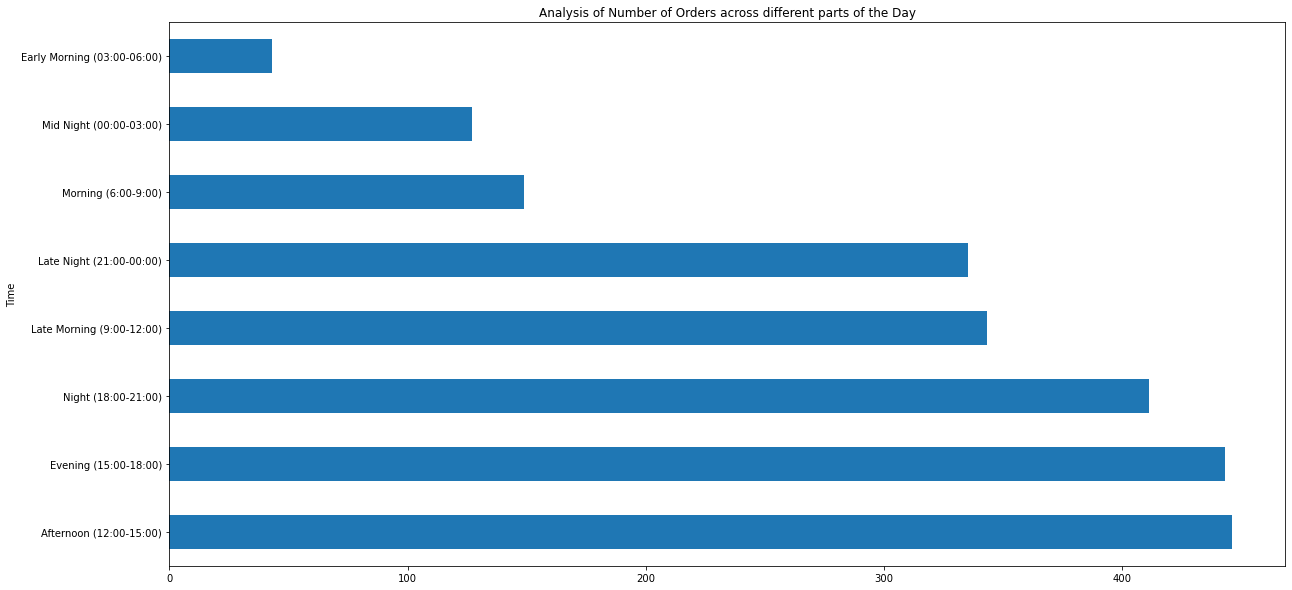

In [118]:
plt.figure(figsize = (20,10))
review_parts_day.groupby('Time')['LineItem Qty'].count().sort_values(ascending=False).plot.barh().set_title('Analysis of Number of Orders across different parts of the Day')
plt.savefig('edatask9.pdf')

# Task 10

In [119]:
merger = PyPDF2.PdfMerger()
for i in range(1,10):
    merger.append('edatask'+str(i)+'.pdf')

merger.write("Full Report.pdf")
merger.close()

In [2]:
import tkinter

master=tkinter.Tk()
master.geometry("400x260")

def click(type):
    startfile('edatask'+type+'.pdf')

button1=tkinter.Button(master, text="1. Analysis of Customer Reviews", command = lambda:click('1'))
button1.grid(row=1,column=0, ipadx = '0px')

button2=tkinter.Button(master, text="2. Analysis of Customer Payment Methods", command = lambda:click('2'))
button2.grid(row=2,column=0, padx= '0px')

button3=tkinter.Button(master, text="3. Analysis of Top Consumer Indian States", command = lambda:click('3'))
button3.grid(row=3,column=0, padx= '0px')

button4=tkinter.Button(master, text="4. Analysis of Top Indian Consumer Cities", command = lambda:click('4'))
button4.grid(row=4,column=0, padx= '0px')

button5=tkinter.Button(master, text="5. Analysis of Top Selling Product Categories", command = lambda:click('5'))
button5.grid(row=5,column=0, padx= '0px')

button6=tkinter.Button(master, text="6. Analysis of Top Product Category Reviews", command = lambda:click('6'))
button6.grid(row=6,column=0, padx= '0px')

button7=tkinter.Button(master, text="7. Analysis of Number of Orders Per Month Per Year", command = lambda:click('7'))
button7.grid(row=7,column=0, padx= '0px')

button8=tkinter.Button(master, text="8. Review Analysis for Number of Orders per Month per Year", command = lambda:click('8'))
button8.grid(row=8,column=0, padx= '20px')

button9=tkinter.Button(master, text="9. Analysis of Number of Orders across parts of a Day", command = lambda:click('9'))
button9.grid(row=9,column=0, padx= '0px')

button10=tkinter.Button(master, text="10. Full Report", command = lambda: startfile('Full Report.pdf'))
button10.grid(row=10,column=0, padx= '0px')

master.mainloop()